# **Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Recuired libraries**

## **1. Install libraries**

In [ ]:
# ! pip install -q lazypredict

In [ ]:
# ! pip install --force-reinstall -q pandas==1.1.5

## **2. Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from scipy.stats import skew

from statsmodels.tsa.arima_model import ARIMA
from sklearn.compose import TransformedTargetRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR

from lightgbm import LGBMRegressor

# **Importing data**

In [ ]:
train_index = list(range(0,5759))
test_index = list(range(5760,8759))
pd.options.display.float_format = '{:,.8f}'.format
train_df = pd.read_csv("/content/drive/MyDrive/Competition/train.csv",float_precision='high')
test_df = pd.read_csv("/content/drive/MyDrive/Competition/test.csv",float_precision='high')
test_df["test_sample"] = pd.Series([True]*test_df.shape[0])
concat_data_list = [train_df,test_df]
seoul_bike_rental_df = pd.concat(concat_data_list,axis=0)
seoul_bike_rental_df["test_sample"].update(seoul_bike_rental_df["test_sample"].fillna(False).astype("category"))

In [ ]:
train_df.describe()

ID              y  ...   Rainfall(mm)  Snowfall (cm)
count 5,760.00000000 5,760.00000000  ... 5,760.00000000 5,760.00000000
mean  2,879.50000000   703.48385417  ...     0.13512153     0.04630208
std   1,662.91310657   655.24949055  ...     1.07531982     0.32372775
min       0.00000000     0.00000000  ...     0.00000000     0.00000000
25%   1,439.75000000   188.00000000  ...     0.00000000     0.00000000
50%   2,879.50000000   485.50000000  ...     0.00000000     0.00000000
75%   4,319.25000000 1,066.00000000  ...     0.00000000     0.00000000
max   5,759.00000000 3,556.00000000  ...    35.00000000     5.10000000

[8 rows x 11 columns]

In [ ]:
rename_dict = {'y':"rented_bike_count",
               "Hour":"hour",
               "Temperature(�C)":"temperature_celsius",
               "Humidity(%)":"humidity_pct",
               "Wind speed (m/s)":"wind_speed_meter_per_sec",
               "Visibility (10m)":"visibility_10_meter",
               "Dew point temperature(�C)":"dew_point_temperature_celsius",
               "Solar Radiation (MJ/m2)":"solar_radiation_mj_per_m2",
               "Rainfall(mm)":"rainfall_mm",
               "Snowfall (cm)":"snowfall_cm",
               "Seasons":"seasons",
               "Holiday":"holiday",
               "Functioning Day":"functioning_day"}
seoul_bike_rental_df.rename(rename_dict,axis=1,inplace=True)
train_df.rename(rename_dict,axis=1,inplace=True)
test_df.rename(rename_dict,axis=1,inplace=True)

In [ ]:
seoul_bike_rental_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             8760 non-null   int64  
 1   Date                           8760 non-null   object 
 2   rented_bike_count              5760 non-null   float64
 3   hour                           8760 non-null   int64  
 4   temperature_celsius            8760 non-null   float64
 5   humidity_pct                   8760 non-null   int64  
 6   wind_speed_meter_per_sec       8760 non-null   float64
 7   visibility_10_meter            8760 non-null   int64  
 8   dew_point_temperature_celsius  8760 non-null   float64
 9   solar_radiation_mj_per_m2      8760 non-null   float64
 10  rainfall_mm                    8760 non-null   float64
 11  snowfall_cm                    8760 non-null   float64
 12  seasons                        8760 non-null   o

In [ ]:
print("bike date frame shape:",seoul_bike_rental_df.shape)

bike date frame shape: (8760, 16)


In [ ]:
seoul_bike_rental_df.describe()

ID  rented_bike_count  ...    rainfall_mm    snowfall_cm
count 8,760.00000000     5,760.00000000  ... 8,760.00000000 8,760.00000000
mean  4,379.50000000       703.48385417  ...     0.14868721     0.07506849
std   2,528.93851250       655.24949055  ...     1.12819297     0.43674618
min       0.00000000         0.00000000  ...     0.00000000     0.00000000
25%   2,189.75000000       188.00000000  ...     0.00000000     0.00000000
50%   4,379.50000000       485.50000000  ...     0.00000000     0.00000000
75%   6,569.25000000     1,066.00000000  ...     0.00000000     0.00000000
max   8,759.00000000     3,556.00000000  ...    35.00000000     8.80000000

[8 rows x 11 columns]

The data doesn't have any null values, but this could mean wrong values

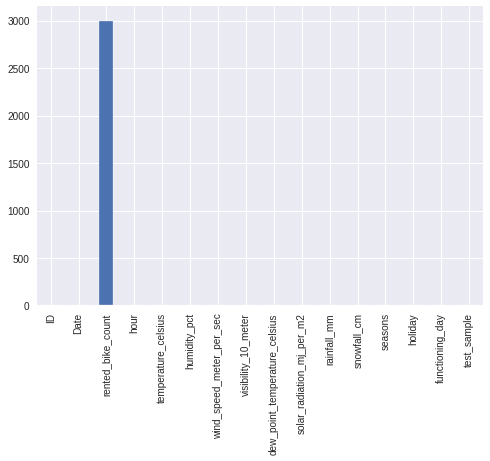

In [ ]:
seoul_bike_rental_df.isna().sum().plot.bar()

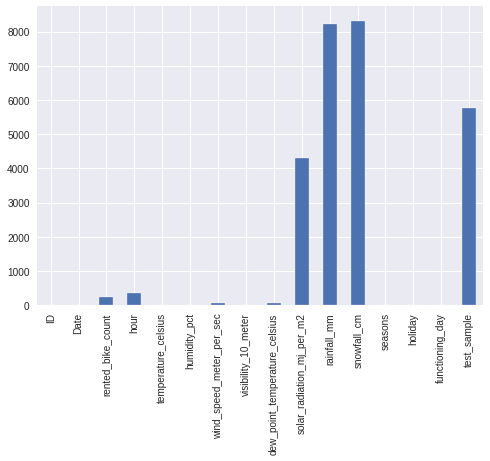

In [ ]:
(seoul_bike_rental_df==0).sum().plot.bar()

In [ ]:
seoul_bike_rental_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             8760 non-null   int64  
 1   Date                           8760 non-null   object 
 2   rented_bike_count              5760 non-null   float64
 3   hour                           8760 non-null   int64  
 4   temperature_celsius            8760 non-null   float64
 5   humidity_pct                   8760 non-null   int64  
 6   wind_speed_meter_per_sec       8760 non-null   float64
 7   visibility_10_meter            8760 non-null   int64  
 8   dew_point_temperature_celsius  8760 non-null   float64
 9   solar_radiation_mj_per_m2      8760 non-null   float64
 10  rainfall_mm                    8760 non-null   float64
 11  snowfall_cm                    8760 non-null   float64
 12  seasons                        8760 non-null   o

In [ ]:
seoul_bike_rental_df

ID        Date  ...  functioning_day  test_sample
0        0  01/12/2017  ...              Yes        False
1        1  01/12/2017  ...              Yes        False
2        2  01/12/2017  ...              Yes        False
3        3  01/12/2017  ...              Yes        False
4        4  01/12/2017  ...              Yes        False
...    ...         ...  ...              ...          ...
2995  8755  30/11/2018  ...              Yes         True
2996  8756  30/11/2018  ...              Yes         True
2997  8757  30/11/2018  ...              Yes         True
2998  8758  30/11/2018  ...              Yes         True
2999  8759  30/11/2018  ...              Yes         True

[8760 rows x 16 columns]

# **Data exploration**

## **1. Prepare the data for exploration**

In [ ]:
prepared_seoul_bike_rental_df = seoul_bike_rental_df.copy()

In [ ]:
def week_number_of_month(date_value):
     return (date_value.isocalendar()[1] - date_value.replace(day=1).isocalendar()[1] + 1)

"""split the date into day, month and year"""
prepared_seoul_bike_rental_df['Date'] = pd.to_datetime(prepared_seoul_bike_rental_df["Date"],format="%d/%m/%Y")
prepared_seoul_bike_rental_df['day'] = prepared_seoul_bike_rental_df['Date'].apply(lambda date: date.strftime("%d")).astype("int64")
prepared_seoul_bike_rental_df['month'] = pd.to_datetime(prepared_seoul_bike_rental_df['Date'], dayfirst=True).dt.month
prepared_seoul_bike_rental_df['year'] = prepared_seoul_bike_rental_df['Date'].apply(lambda date: date.strftime("%Y")).astype("int64")
prepared_seoul_bike_rental_df['weekday'] = prepared_seoul_bike_rental_df['Date'].apply(lambda date: date.weekday()).astype("int64")
prepared_seoul_bike_rental_df['yearweek'] = prepared_seoul_bike_rental_df['Date'].apply(lambda date: date.isocalendar()[1]).astype("int64")
prepared_seoul_bike_rental_df['weekmonth'] = prepared_seoul_bike_rental_df['Date'].apply(week_number_of_month).astype("int64")

# prepared_seoul_bike_rental_df.drop(columns="Date",inplace=True)

In [ ]:
category_col_list = prepared_seoul_bike_rental_df.columns[prepared_seoul_bike_rental_df.dtypes=="object"].tolist()
category_col_dict = dict(zip(category_col_list,len(category_col_list)*["category"]))
prepared_seoul_bike_rental_df = prepared_seoul_bike_rental_df.astype(category_col_dict)

In [ ]:
prepared_seoul_bike_rental_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ID                             8760 non-null   int64         
 1   Date                           8760 non-null   datetime64[ns]
 2   rented_bike_count              5760 non-null   float64       
 3   hour                           8760 non-null   int64         
 4   temperature_celsius            8760 non-null   float64       
 5   humidity_pct                   8760 non-null   int64         
 6   wind_speed_meter_per_sec       8760 non-null   float64       
 7   visibility_10_meter            8760 non-null   int64         
 8   dew_point_temperature_celsius  8760 non-null   float64       
 9   solar_radiation_mj_per_m2      8760 non-null   float64       
 10  rainfall_mm                    8760 non-null   float64       
 11  snowfall_cm      

In [ ]:
prepared_seoul_bike_rental_df.holiday = prepared_seoul_bike_rental_df.holiday.apply(lambda h: True if h=="Holiday" else False).astype("category")
prepared_seoul_bike_rental_df.functioning_day = prepared_seoul_bike_rental_df.functioning_day.apply(lambda fd: True if fd=="Yes" else False).astype("category")

In [ ]:
prepared_seoul_bike_rental_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ID                             8760 non-null   int64         
 1   Date                           8760 non-null   datetime64[ns]
 2   rented_bike_count              5760 non-null   float64       
 3   hour                           8760 non-null   int64         
 4   temperature_celsius            8760 non-null   float64       
 5   humidity_pct                   8760 non-null   int64         
 6   wind_speed_meter_per_sec       8760 non-null   float64       
 7   visibility_10_meter            8760 non-null   int64         
 8   dew_point_temperature_celsius  8760 non-null   float64       
 9   solar_radiation_mj_per_m2      8760 non-null   float64       
 10  rainfall_mm                    8760 non-null   float64       
 11  snowfall_cm      

In [ ]:
def categorize_seasons(season):
    if season == "Spring": return 1
    elif season == "Summer": return 2
    elif season == "Autumn": return 3
    else: return 4

prepared_seoul_bike_rental_df.seasons = prepared_seoul_bike_rental_df.seasons.apply(categorize_seasons).astype("int64")

In [ ]:
prepared_seoul_bike_rental_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ID                             8760 non-null   int64         
 1   Date                           8760 non-null   datetime64[ns]
 2   rented_bike_count              5760 non-null   float64       
 3   hour                           8760 non-null   int64         
 4   temperature_celsius            8760 non-null   float64       
 5   humidity_pct                   8760 non-null   int64         
 6   wind_speed_meter_per_sec       8760 non-null   float64       
 7   visibility_10_meter            8760 non-null   int64         
 8   dew_point_temperature_celsius  8760 non-null   float64       
 9   solar_radiation_mj_per_m2      8760 non-null   float64       
 10  rainfall_mm                    8760 non-null   float64       
 11  snowfall_cm      

In [ ]:
prepared_seoul_bike_rental_df.dtypes.value_counts()

int64             11
float64            7
category           3
datetime64[ns]     1
dtype: int64

In [ ]:
categorical_features = prepared_seoul_bike_rental_df.columns[prepared_seoul_bike_rental_df.dtypes=='category'].to_list()
numerical_features = prepared_seoul_bike_rental_df.columns[prepared_seoul_bike_rental_df.dtypes!='category'].to_list()
discrete_features = [col for col in prepared_seoul_bike_rental_df[numerical_features] if len(prepared_seoul_bike_rental_df[col].value_counts())<=52]
continuous_features = [col for col in prepared_seoul_bike_rental_df[numerical_features] if len(prepared_seoul_bike_rental_df[col].value_counts())>52]

numerical_features.remove("ID")
continuous_features.remove("ID")

discrete_features.remove("snowfall_cm")
continuous_features.append("snowfall_cm")

print("The categorical feature",categorical_features," ,their number:",len(categorical_features))
print("The numerical feature",numerical_features," ,their number:",len(numerical_features))
print("The discrete feature",discrete_features," ,their number:",len(discrete_features))
print("The continuous feature",continuous_features," ,their number:",len(continuous_features))


The categorical feature ['holiday', 'functioning_day', 'test_sample']  ,their number: 3
The numerical feature ['Date', 'rented_bike_count', 'hour', 'temperature_celsius', 'humidity_pct', 'wind_speed_meter_per_sec', 'visibility_10_meter', 'dew_point_temperature_celsius', 'solar_radiation_mj_per_m2', 'rainfall_mm', 'snowfall_cm', 'seasons', 'day', 'month', 'year', 'weekday', 'yearweek', 'weekmonth']  ,their number: 18
The discrete feature ['hour', 'seasons', 'day', 'month', 'year', 'weekday', 'yearweek', 'weekmonth']  ,their number: 8
The continuous feature ['Date', 'rented_bike_count', 'temperature_celsius', 'humidity_pct', 'wind_speed_meter_per_sec', 'visibility_10_meter', 'dew_point_temperature_celsius', 'solar_radiation_mj_per_m2', 'rainfall_mm', 'snowfall_cm']  ,their number: 10


In [ ]:
numerical_features.remove("Date")

prepared_seoul_bike_rental_df.astype(dict(zip(numerical_features,["float64"]*len(numerical_features))))

ID       Date  rented_bike_count  ...    weekday    yearweek  weekmonth
0        0 2017-12-01       254.00000000  ... 4.00000000 48.00000000 1.00000000
1        1 2017-12-01       204.00000000  ... 4.00000000 48.00000000 1.00000000
2        2 2017-12-01       173.00000000  ... 4.00000000 48.00000000 1.00000000
3        3 2017-12-01       107.00000000  ... 4.00000000 48.00000000 1.00000000
4        4 2017-12-01        78.00000000  ... 4.00000000 48.00000000 1.00000000
...    ...        ...                ...  ...        ...         ...        ...
2995  8755 2018-11-30                nan  ... 4.00000000 48.00000000 5.00000000
2996  8756 2018-11-30                nan  ... 4.00000000 48.00000000 5.00000000
2997  8757 2018-11-30                nan  ... 4.00000000 48.00000000 5.00000000
2998  8758 2018-11-30                nan  ... 4.00000000 48.00000000 5.00000000
2999  8759 2018-11-30                nan  ... 4.00000000 48.00000000 5.00000000

[8760 rows x 22 columns]

In [ ]:
figure_size = [20,20]
def get_aca(size=None):
    if size is None:
        size = [20, 20]
    fig = plt.figure(figsize=size,)
    return fig.gca()

sns.set(font_scale=1)
plt.style.use('seaborn')

In [ ]:
prepared_seoul_bike_rental_df

ID       Date  rented_bike_count  ...  weekday  yearweek  weekmonth
0        0 2017-12-01       254.00000000  ...        4        48          1
1        1 2017-12-01       204.00000000  ...        4        48          1
2        2 2017-12-01       173.00000000  ...        4        48          1
3        3 2017-12-01       107.00000000  ...        4        48          1
4        4 2017-12-01        78.00000000  ...        4        48          1
...    ...        ...                ...  ...      ...       ...        ...
2995  8755 2018-11-30                nan  ...        4        48          5
2996  8756 2018-11-30                nan  ...        4        48          5
2997  8757 2018-11-30                nan  ...        4        48          5
2998  8758 2018-11-30                nan  ...        4        48          5
2999  8759 2018-11-30                nan  ...        4        48          5

[8760 rows x 22 columns]

In [ ]:
prepared_seoul_bike_rental_df.describe()

ID  rented_bike_count  ...       yearweek      weekmonth
count 8,760.00000000     5,760.00000000  ... 8,760.00000000 8,760.00000000
mean  4,379.50000000       703.48385417  ...    26.55890411     3.11232877
std   2,528.93851250       655.24949055  ...    15.03068979     1.31426993
min       0.00000000         0.00000000  ...     1.00000000     1.00000000
25%   2,189.75000000       188.00000000  ...    14.00000000     2.00000000
50%   4,379.50000000       485.50000000  ...    27.00000000     3.00000000
75%   6,569.25000000     1,066.00000000  ...    40.00000000     4.00000000
max   8,759.00000000     3,556.00000000  ...    52.00000000     6.00000000

[8 rows x 18 columns]

## **2. Exploration**

In [ ]:
"""the day can be functional and holiday at the same time"""
prepared_seoul_bike_rental_df[["functioning_day","holiday"]].value_counts()

functioning_day  holiday
True             False      8057
                 True        408
False            False       271
                 True         24
dtype: int64

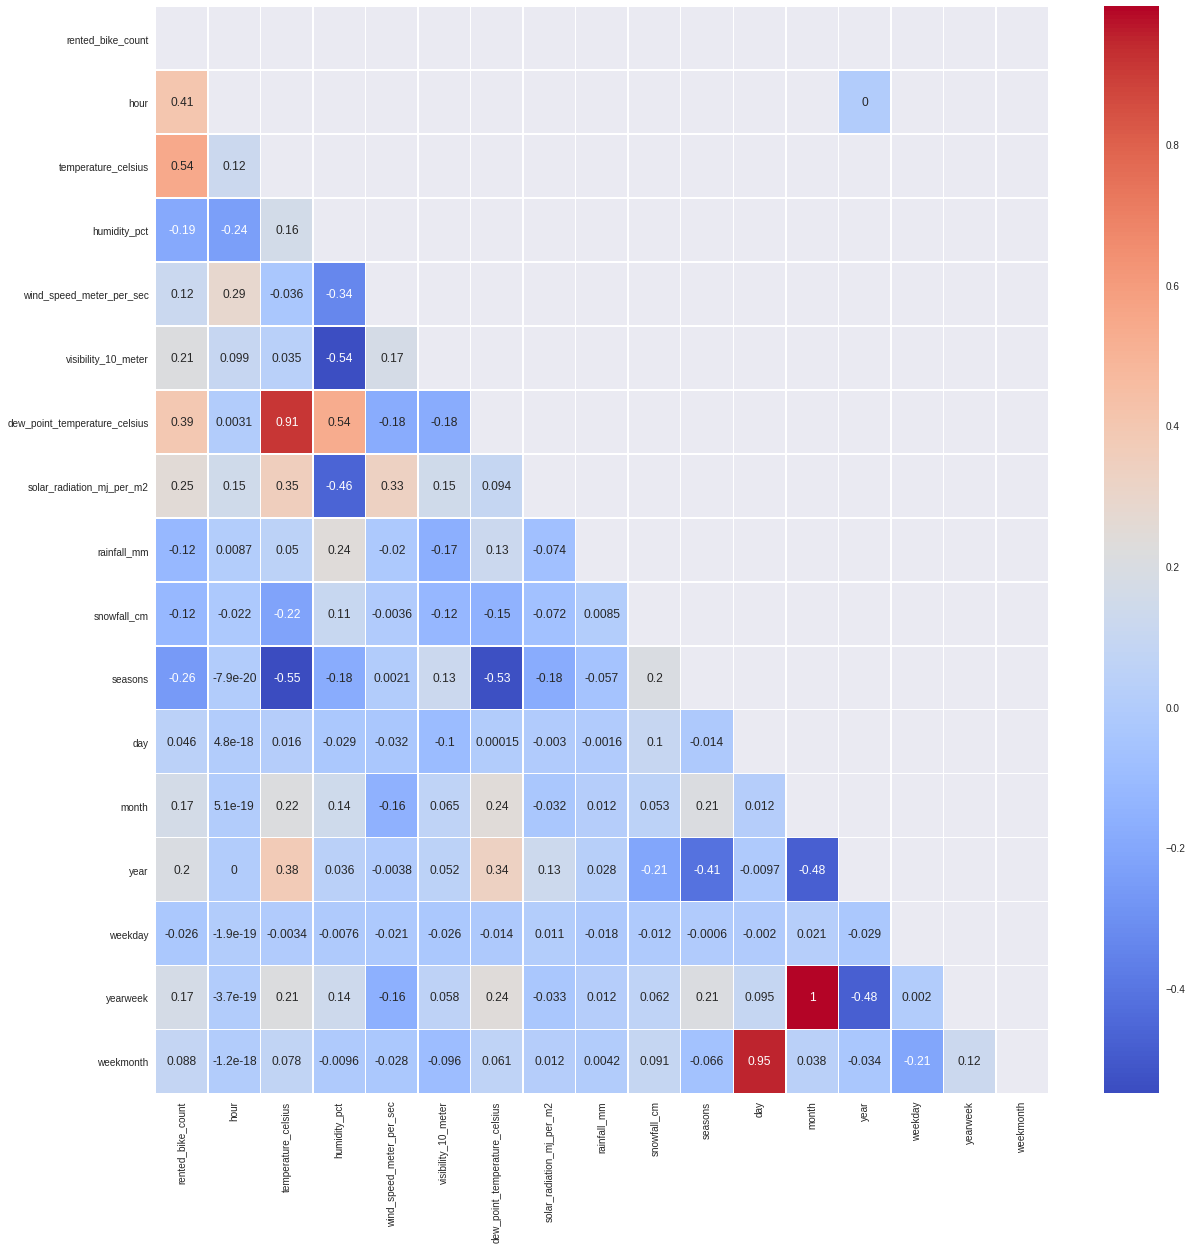

In [ ]:
heatmap_mask = np.triu(prepared_seoul_bike_rental_df[numerical_features].corr())
sns.heatmap(prepared_seoul_bike_rental_df[numerical_features].corr(),annot=True,ax=get_aca(),cmap="coolwarm",linewidth=0.5,mask=heatmap_mask);

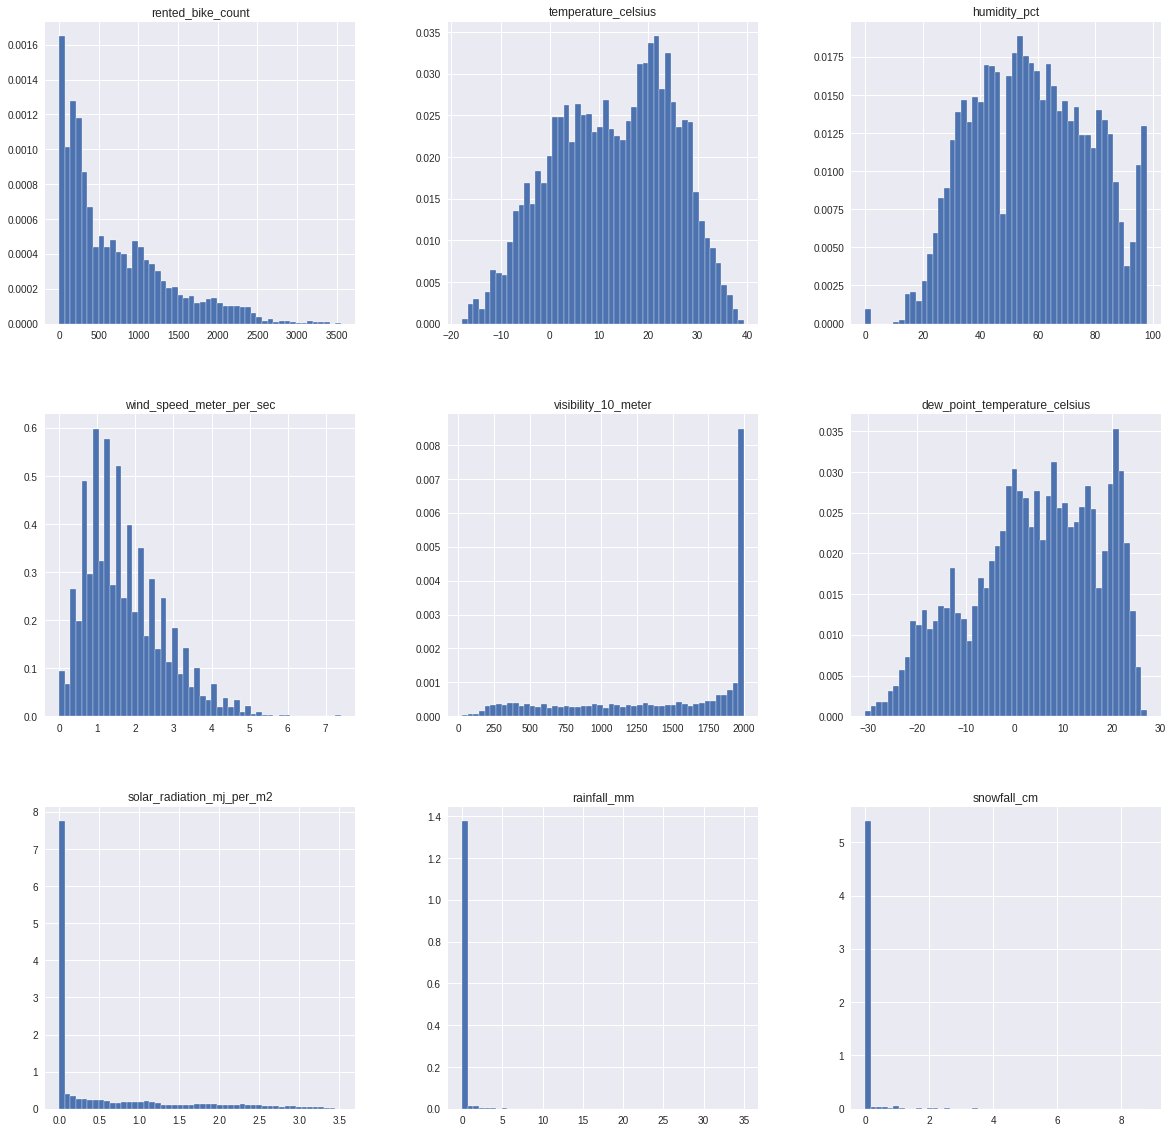

In [ ]:
prepared_seoul_bike_rental_df[continuous_features].hist(bins=50,figsize=figure_size,density=True);

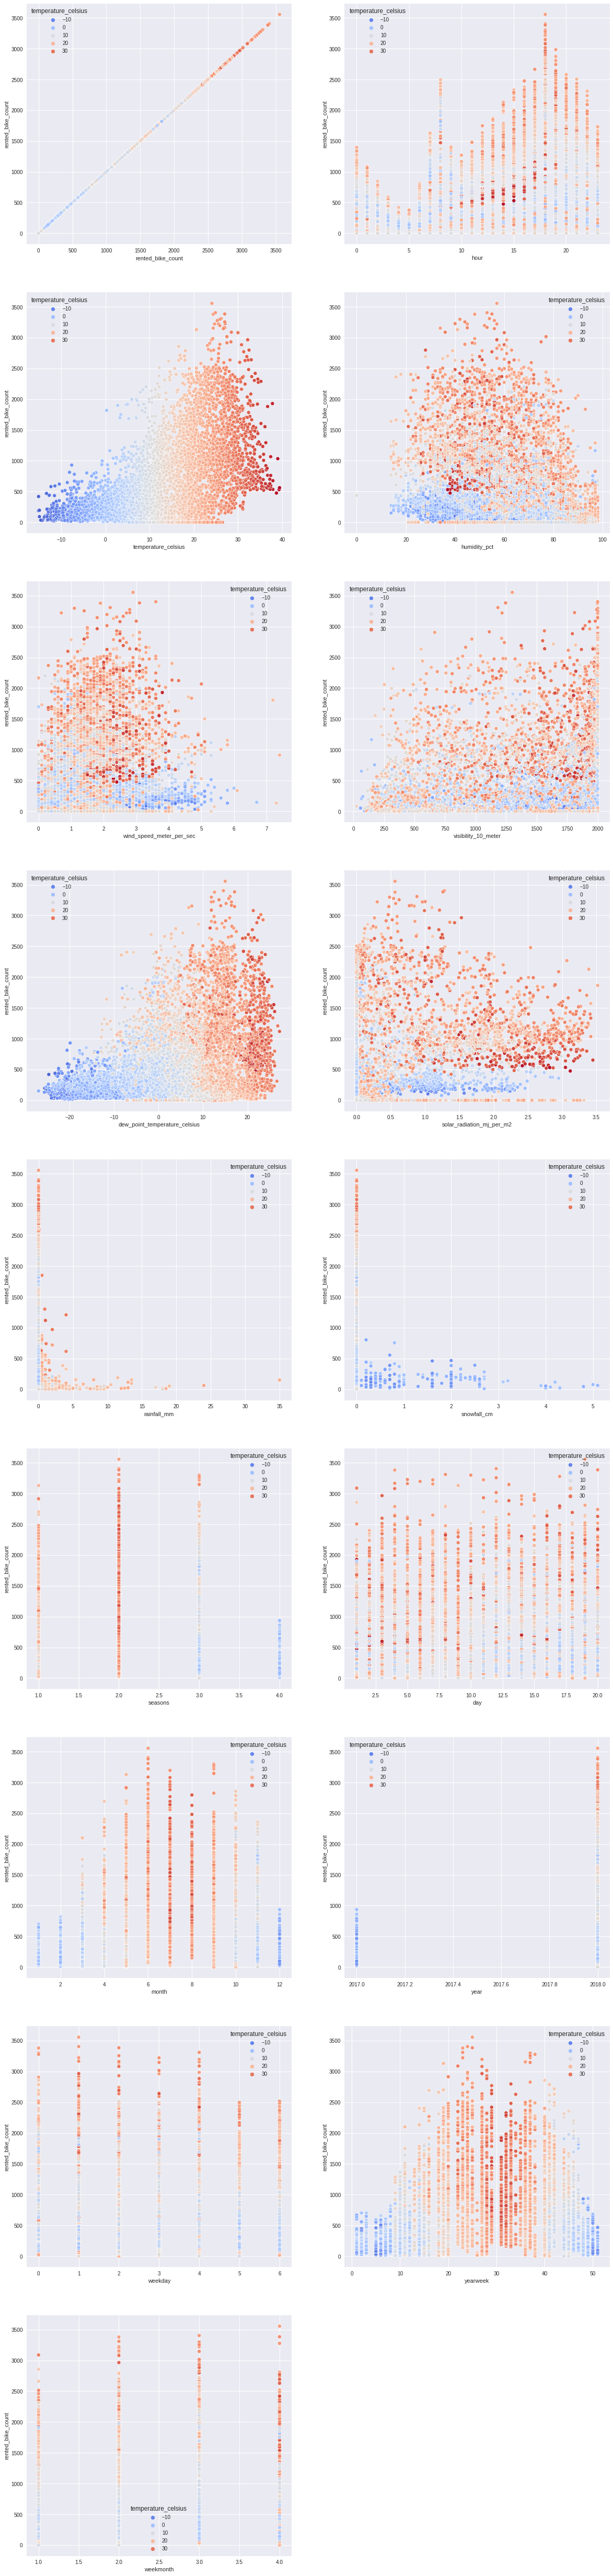

In [ ]:
fig = plt.figure(figsize=[20,100])
for num, col in zip(list(range(1,len(numerical_features)+1)) , numerical_features):
    ax = fig.add_subplot(10,2,num)
    sns.scatterplot(data=prepared_seoul_bike_rental_df,x=col,y="rented_bike_count",hue="temperature_celsius",palette="coolwarm",ax=ax)

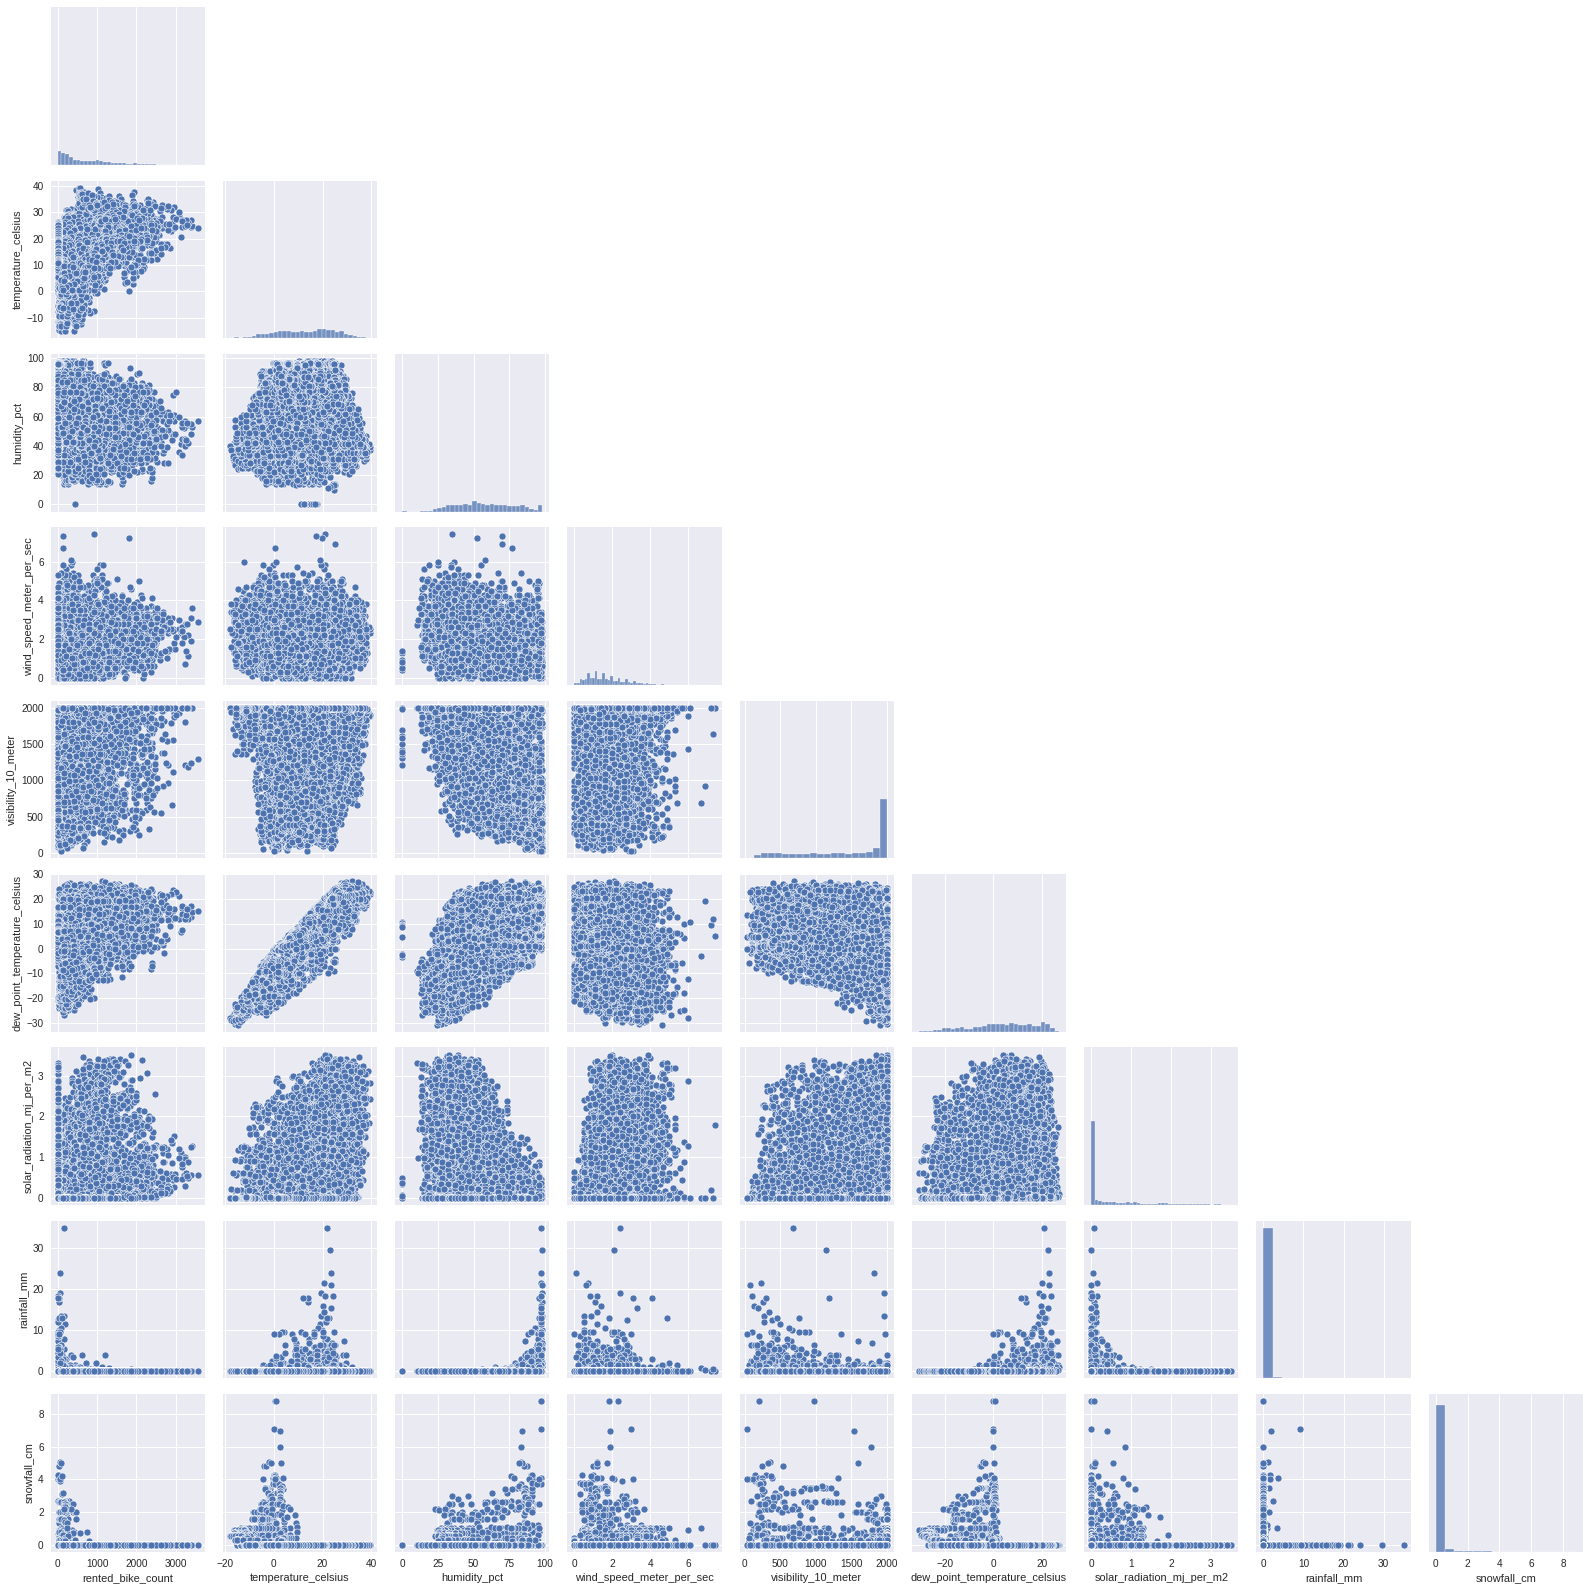

In [ ]:
sns.pairplot(prepared_seoul_bike_rental_df[continuous_features],corner=True);

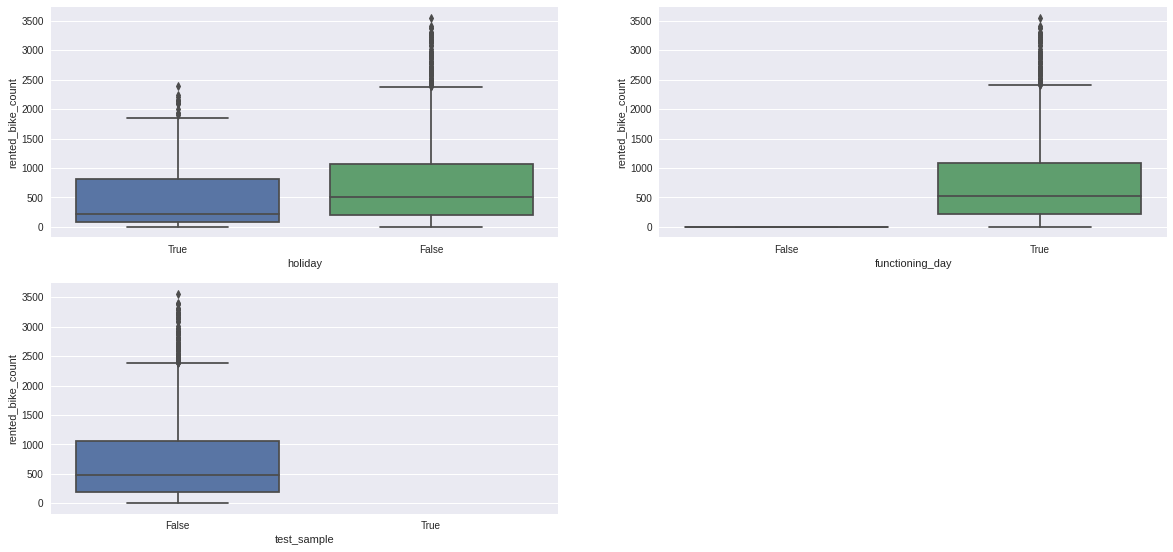

In [ ]:
fig = plt.figure(figsize=[20,50])
for num, col in zip(list(range(1,len(categorical_features)+1)) , categorical_features):
    ax = fig.add_subplot(10,2,num)
    sns.boxplot(data=prepared_seoul_bike_rental_df,x=col,y="rented_bike_count",ax=ax)

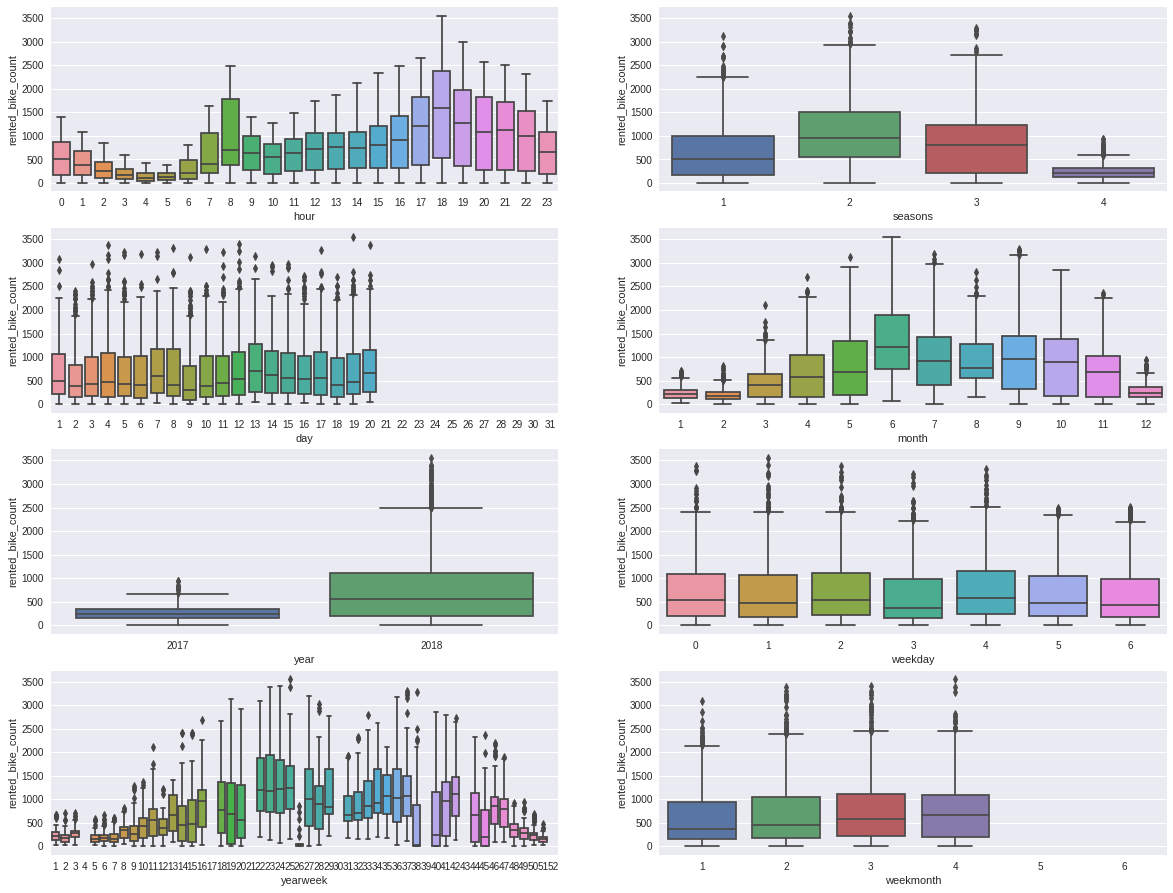

In [ ]:
fig = plt.figure(figsize=[20,40])
for num, col in zip(list(range(1,len(discrete_features)+1)) , discrete_features):
    ax = fig.add_subplot(10,2,num)
    sns.boxplot(data=prepared_seoul_bike_rental_df,x=col,y="rented_bike_count",ax=ax)


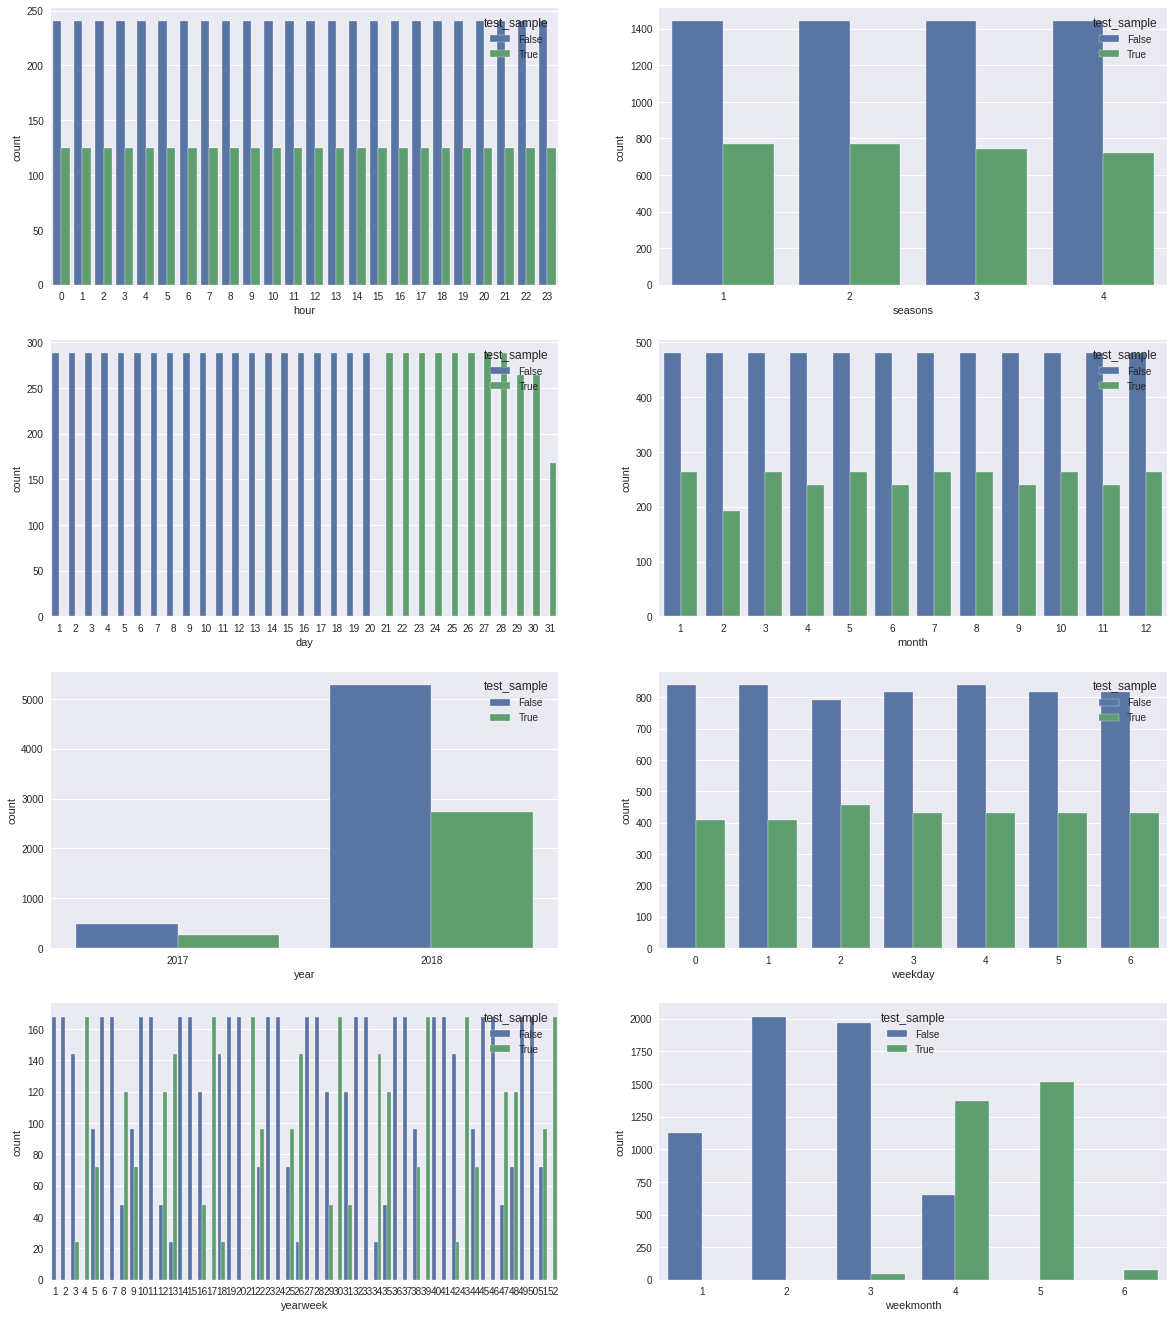

In [ ]:
fig = plt.figure(figsize=[20,60])
for num, col in zip(list(range(1,len(discrete_features)+1)) , discrete_features):
    ax = fig.add_subplot(10,2,num)
    sns.countplot(data=prepared_seoul_bike_rental_df,x=col,hue="test_sample",ax=ax)

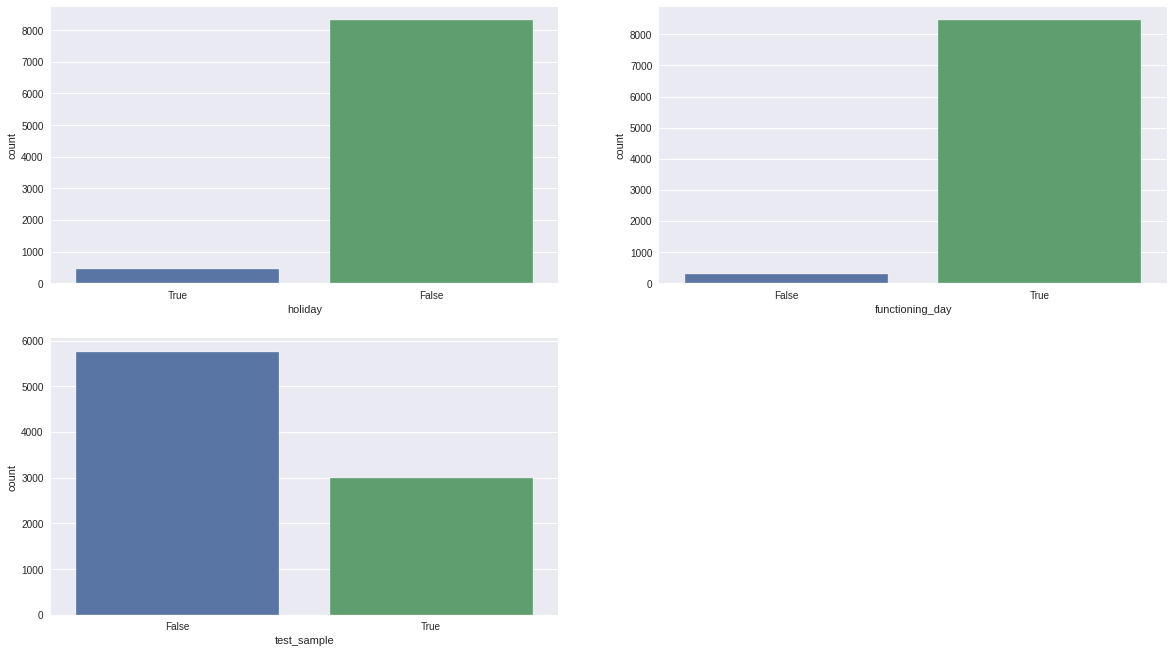

In [ ]:
fig = plt.figure(figsize=[20,60])
for num, col in zip(list(range(1,len(categorical_features)+1)) , categorical_features):
    ax = fig.add_subplot(10,2,num)
    sns.countplot(data=prepared_seoul_bike_rental_df,x=col,ax=ax)

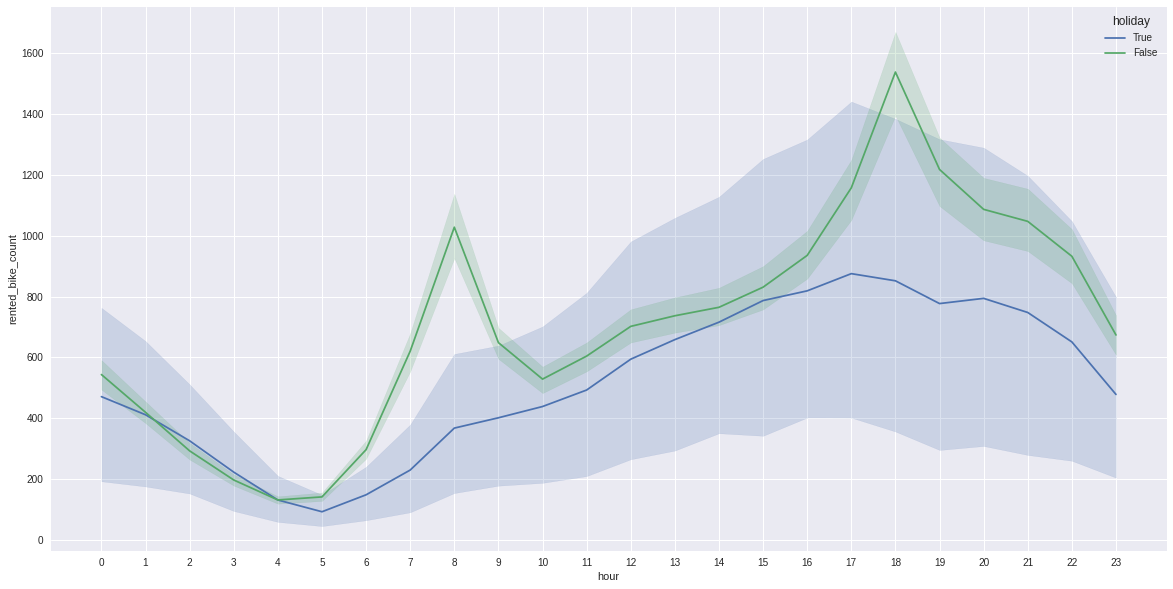

In [ ]:
ax = get_aca([20,10])
ax.set_xticks(np.arange(0,24,1))
sns.lineplot(data=prepared_seoul_bike_rental_df,x="hour",y="rented_bike_count",hue="holiday",ax=ax)

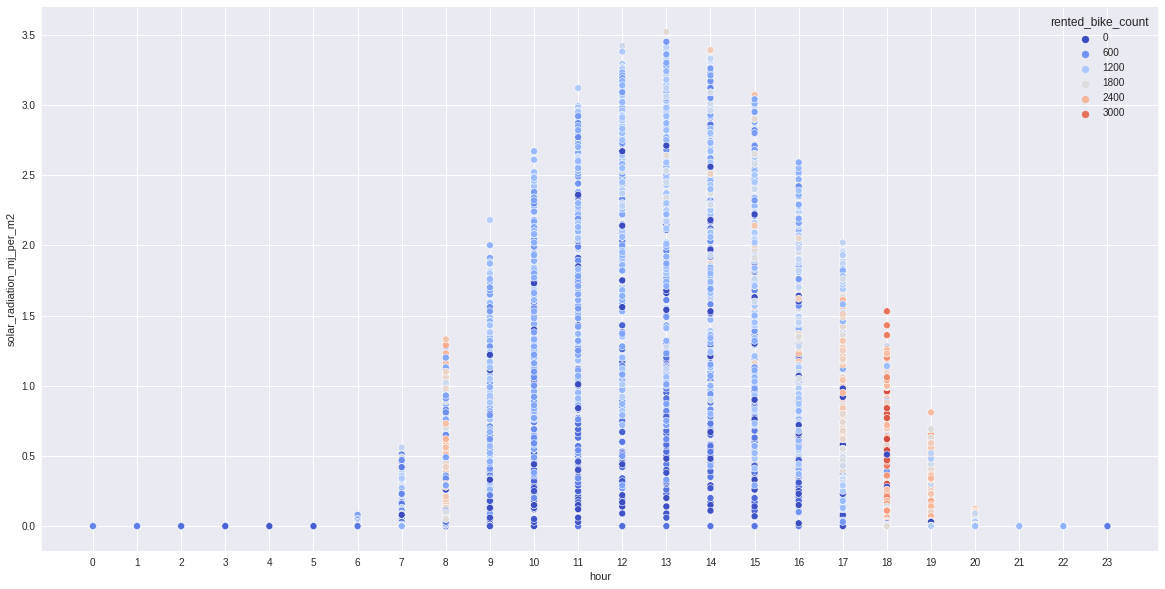

In [ ]:
ax = get_aca([20,10])
ax.set_xticks(np.arange(0,24,1))
sns.scatterplot(data=prepared_seoul_bike_rental_df,x="hour",y="solar_radiation_mj_per_m2",hue="rented_bike_count",palette="coolwarm",ax=ax)

In [ ]:
"""No duplication in the data"""
prepared_seoul_bike_rental_df.duplicated().value_counts()

False    8760
dtype: int64

In [ ]:
(prepared_seoul_bike_rental_df[prepared_seoul_bike_rental_df["year"]==2017])["month"].unique()

array([12])

In [ ]:
prepared_seoul_bike_rental_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ID                             8760 non-null   int64         
 1   Date                           8760 non-null   datetime64[ns]
 2   rented_bike_count              5760 non-null   float64       
 3   hour                           8760 non-null   int64         
 4   temperature_celsius            8760 non-null   float64       
 5   humidity_pct                   8760 non-null   int64         
 6   wind_speed_meter_per_sec       8760 non-null   float64       
 7   visibility_10_meter            8760 non-null   int64         
 8   dew_point_temperature_celsius  8760 non-null   float64       
 9   solar_radiation_mj_per_m2      8760 non-null   float64       
 10  rainfall_mm                    8760 non-null   float64       
 11  snowfall_cm      

In [ ]:
prepared_seoul_bike_rental_df.head()

ID       Date  rented_bike_count  hour  ...  year  weekday  yearweek  weekmonth
0   0 2017-12-01       254.00000000     0  ...  2017        4        48          1
1   1 2017-12-01       204.00000000     1  ...  2017        4        48          1
2   2 2017-12-01       173.00000000     2  ...  2017        4        48          1
3   3 2017-12-01       107.00000000     3  ...  2017        4        48          1
4   4 2017-12-01        78.00000000     4  ...  2017        4        48          1

[5 rows x 22 columns]

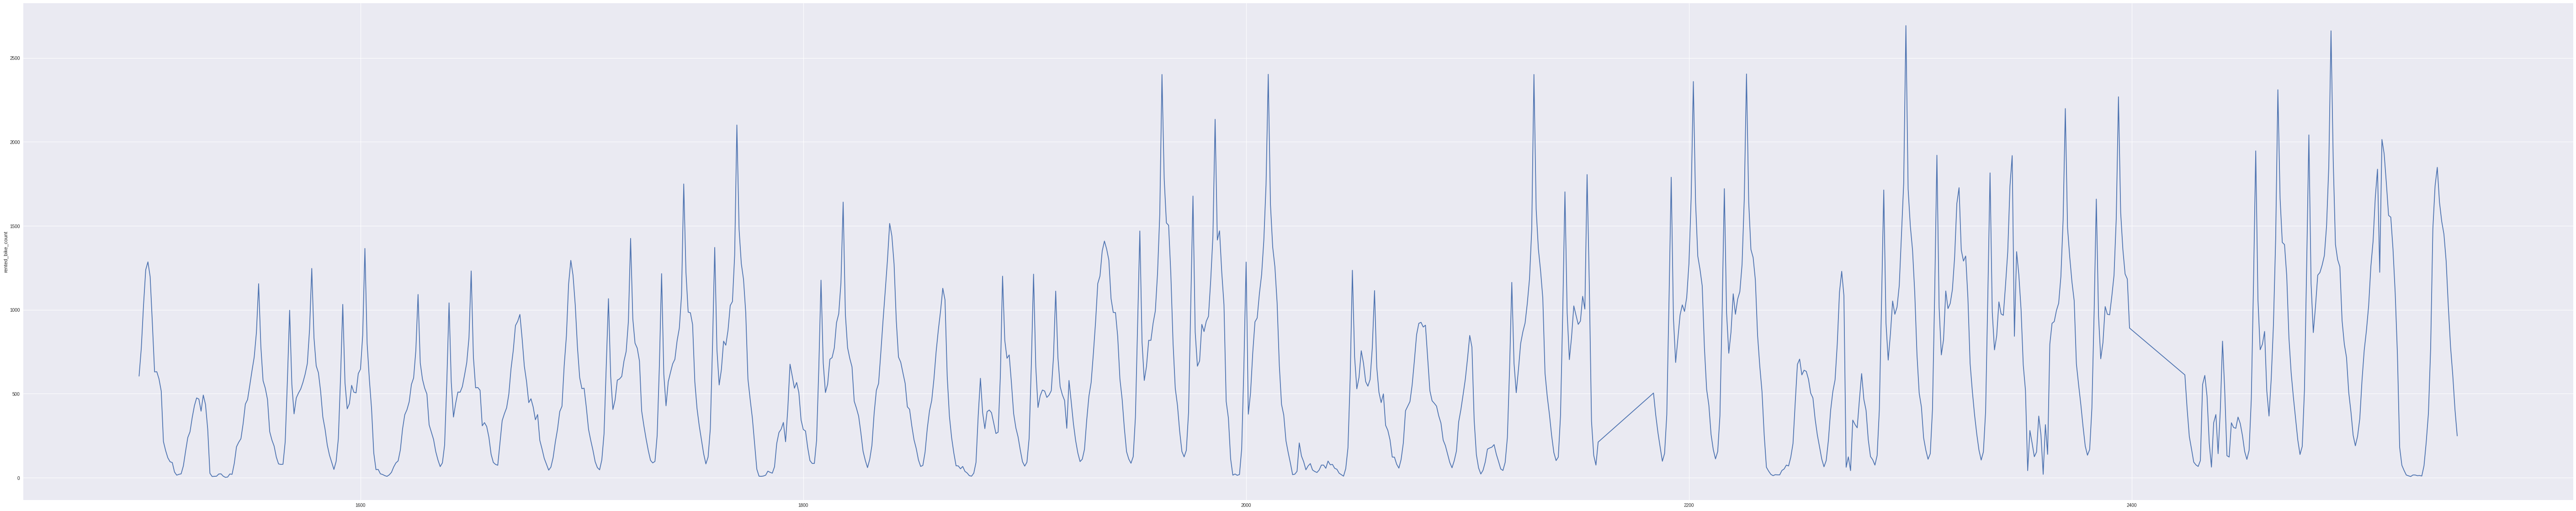

In [ ]:
a = prepared_seoul_bike_rental_df[(prepared_seoul_bike_rental_df["holiday"]==False)&(prepared_seoul_bike_rental_df["functioning_day"]==True)].iloc[1380:2380,:]
sns.lineplot(data=a,x=a.index,y="rented_bike_count",ax=get_aca([100,20]))

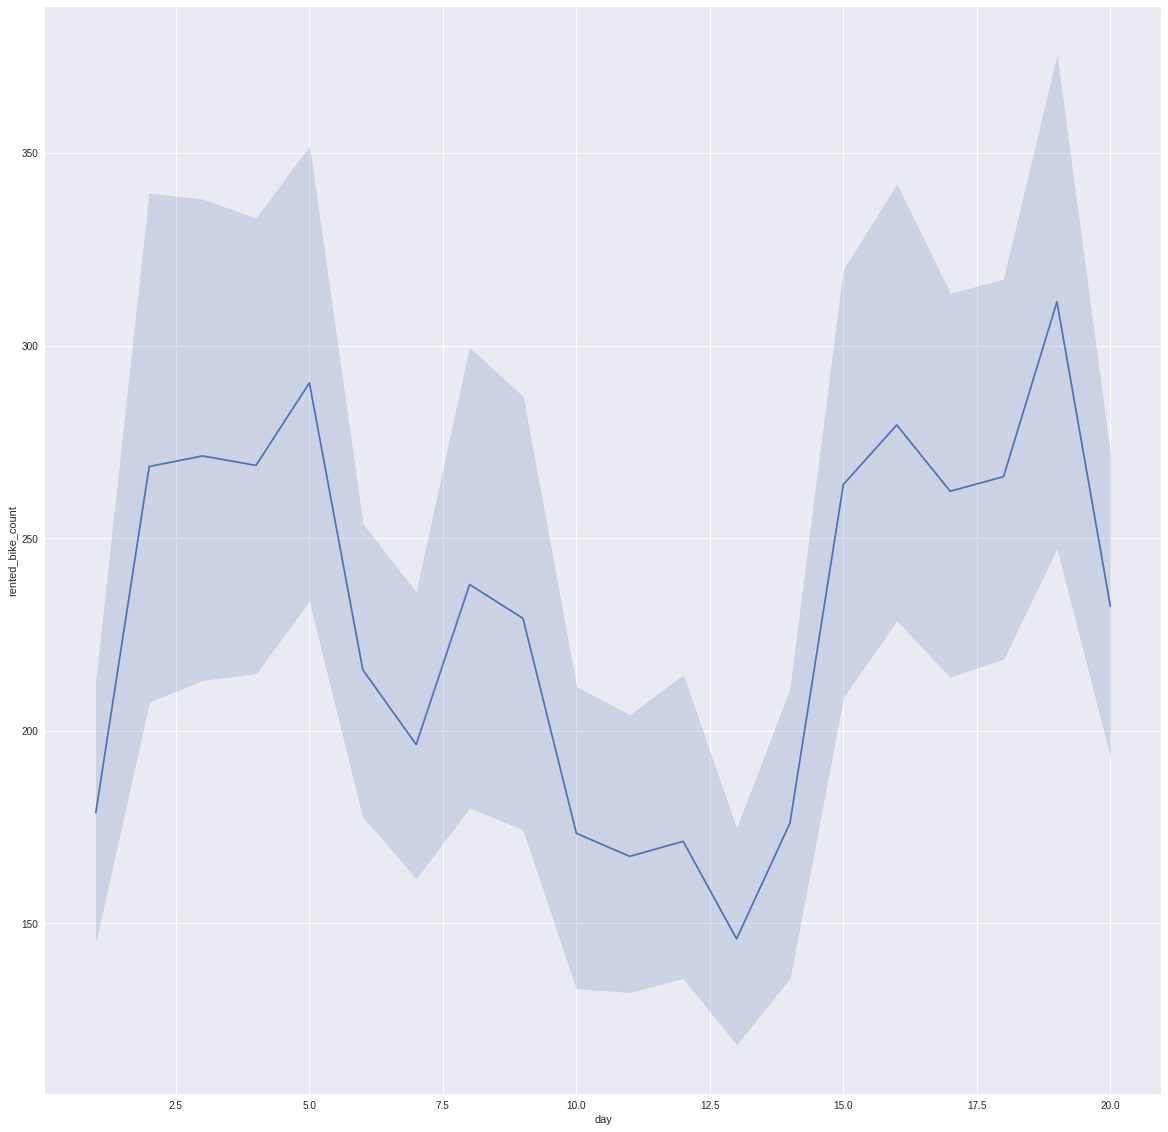

In [ ]:
sns.lineplot(data=prepared_seoul_bike_rental_df[prepared_seoul_bike_rental_df["month"]==1],x="day",y="rented_bike_count",ax=get_aca())

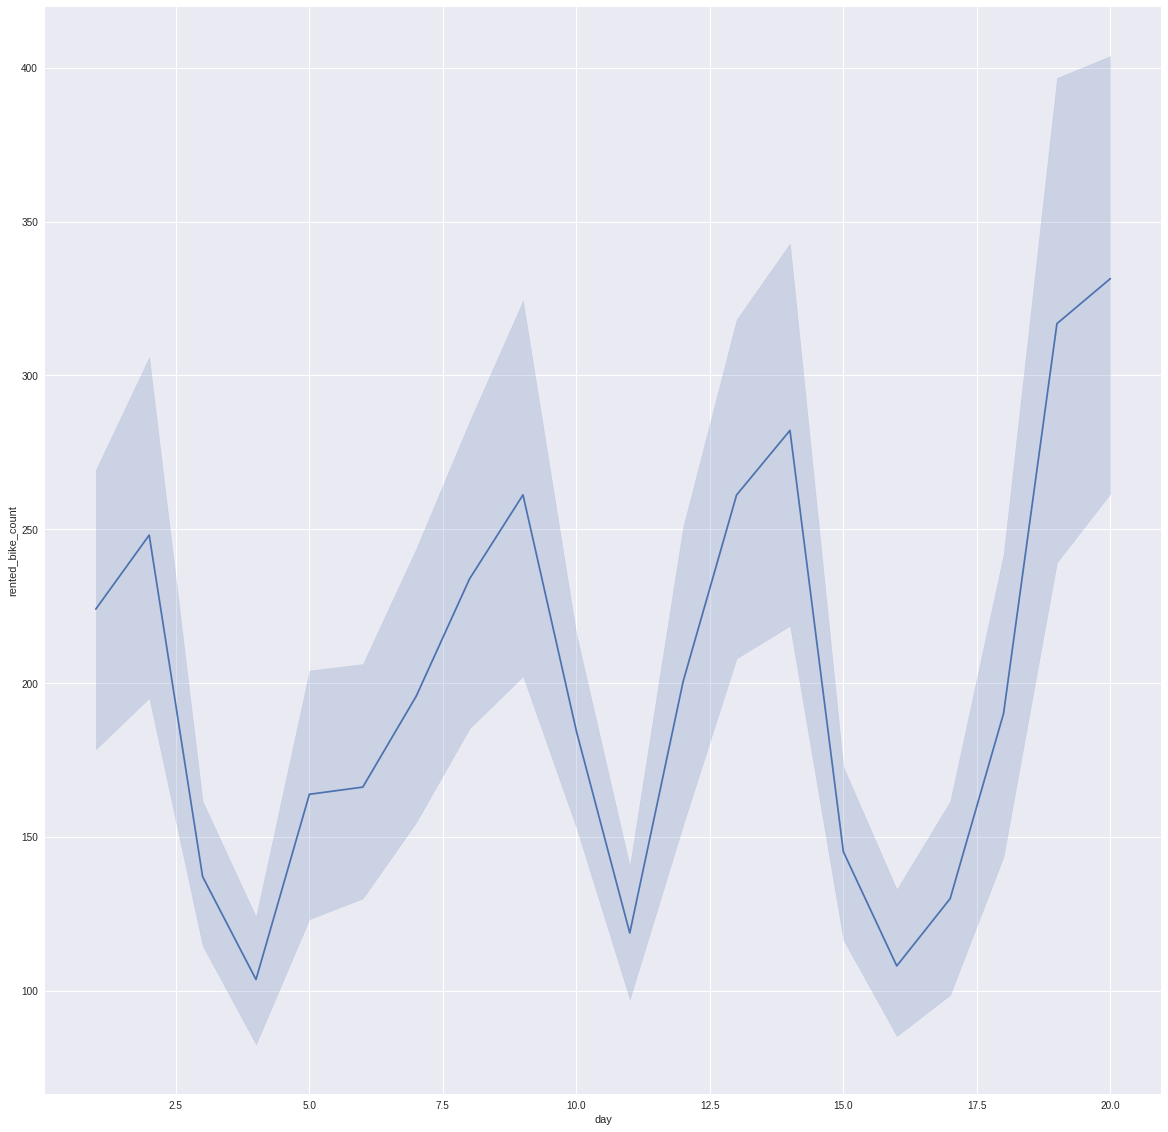

In [ ]:
sns.lineplot(data=prepared_seoul_bike_rental_df[prepared_seoul_bike_rental_df["month"]==2],x="day",y="rented_bike_count",ax=get_aca())

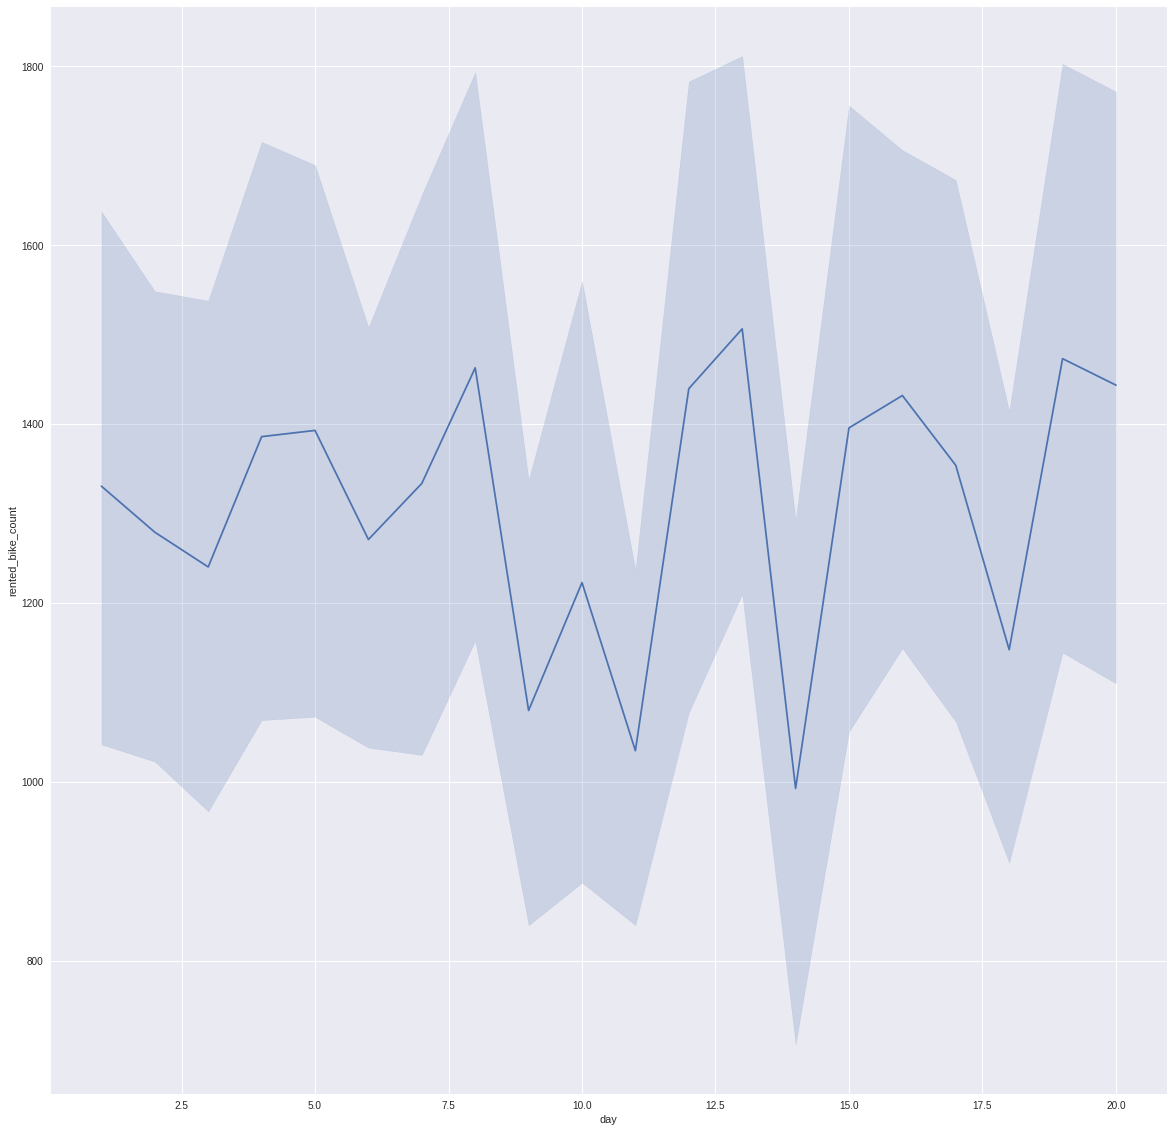

In [ ]:
sns.lineplot(data=prepared_seoul_bike_rental_df[prepared_seoul_bike_rental_df["month"]==6],x="day",y="rented_bike_count",ax=get_aca())

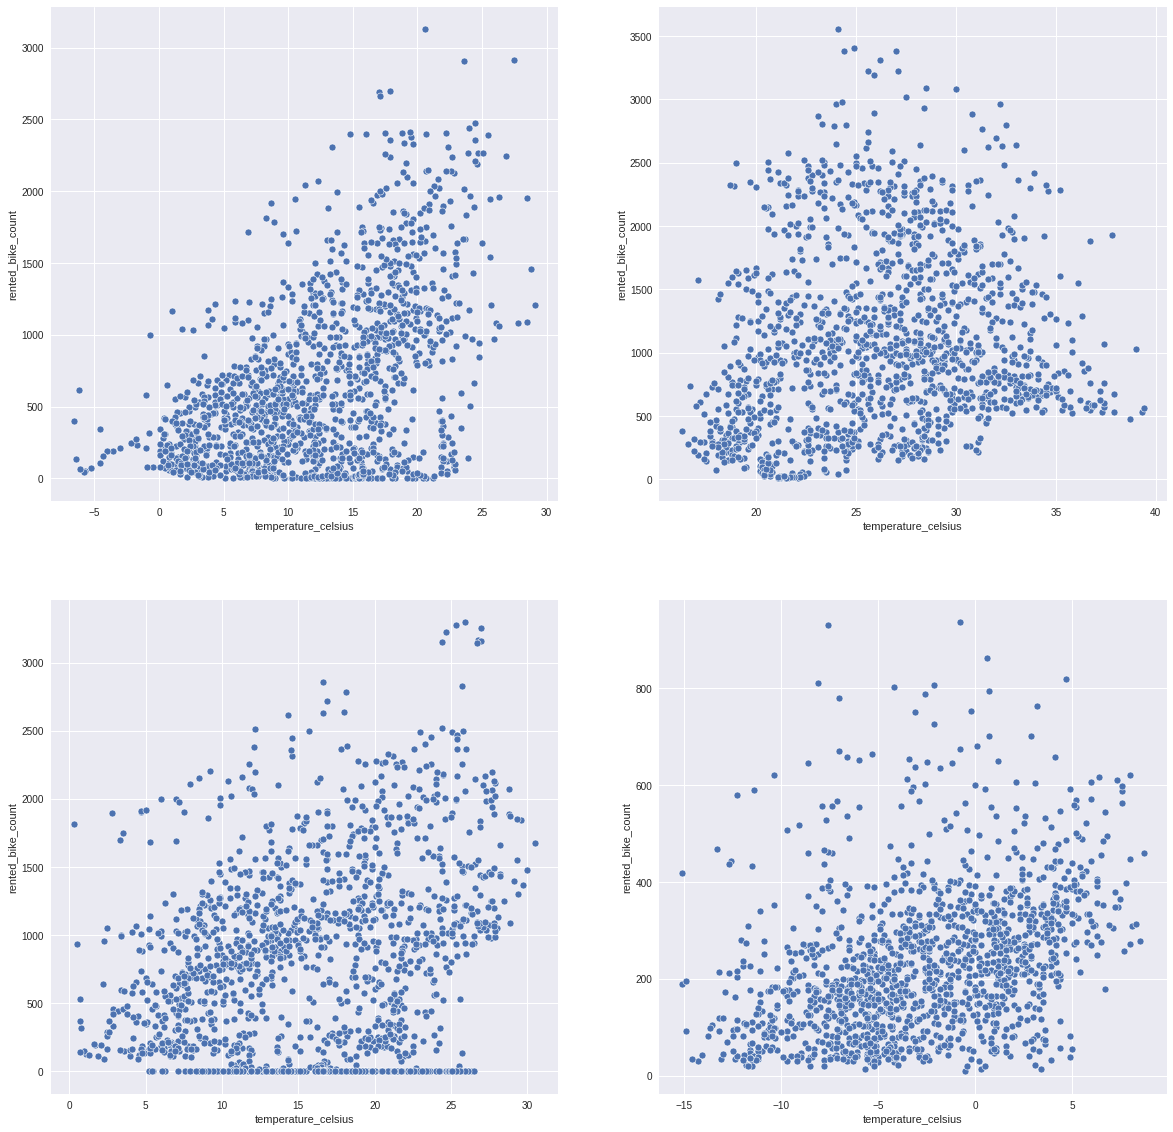

In [ ]:
"""test if the data after 0 temp is the same befor"""
fig = plt.figure(figsize=figure_size)
ax = fig.add_subplot(2,2,1)
sns.scatterplot(data=prepared_seoul_bike_rental_df[prepared_seoul_bike_rental_df.seasons==1],x="temperature_celsius",y="rented_bike_count",ax=ax)
ax = fig.add_subplot(2,2,2)
sns.scatterplot(data=prepared_seoul_bike_rental_df[prepared_seoul_bike_rental_df.seasons==2],x="temperature_celsius",y="rented_bike_count",ax=ax)
ax = fig.add_subplot(2,2,3)
sns.scatterplot(data=prepared_seoul_bike_rental_df[prepared_seoul_bike_rental_df.seasons==3],x="temperature_celsius",y="rented_bike_count",ax=ax)
ax = fig.add_subplot(2,2,4)
sns.scatterplot(data=prepared_seoul_bike_rental_df[prepared_seoul_bike_rental_df.seasons==4],x="temperature_celsius",y="rented_bike_count",ax=ax)

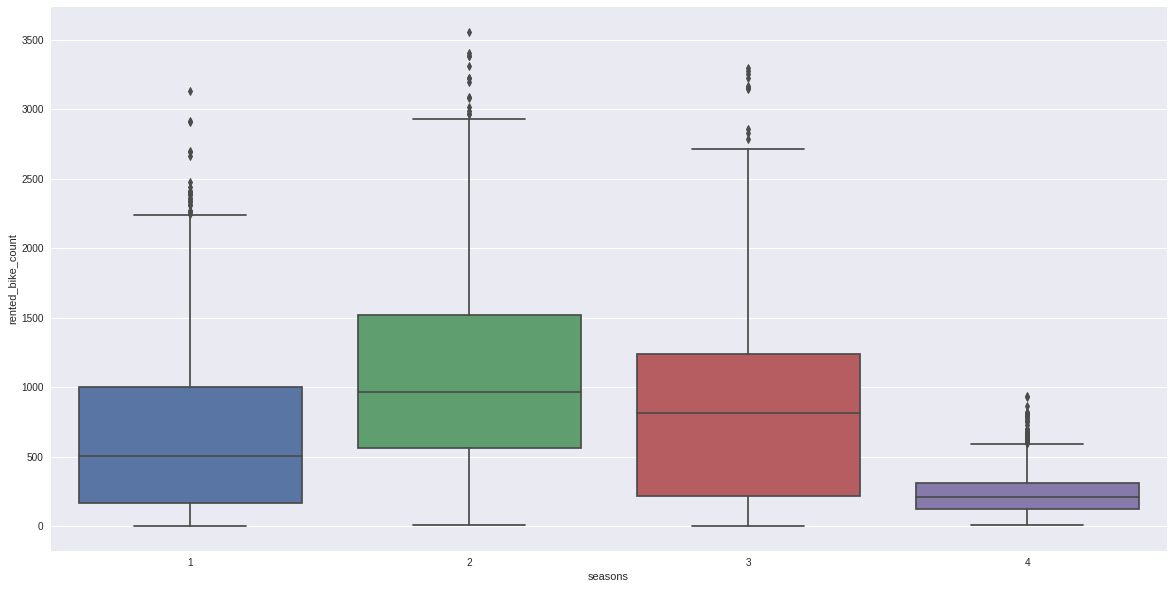

In [ ]:
sns.boxplot(data=prepared_seoul_bike_rental_df,x="seasons",y="rented_bike_count",ax=get_aca([20,10]))

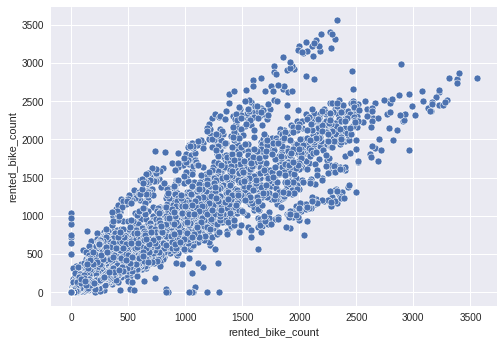

In [ ]:
sns.scatterplot(prepared_seoul_bike_rental_df["rented_bike_count"].shift(1),prepared_seoul_bike_rental_df["rented_bike_count"])

## **3. Exploration conclusion**
* ### *The Dew point temperature, and the Temperature(C) are highly correlated "0.91"*
* ### *Temperature is the most column that hase correlation with rental number "0.54"*
* ### *Humidity has a correlation with visibility "-0.54" and with solar radiation "-0.46" and with Dew point temperature "0.54"*
* ### *Rental bike count hase log distribution*
* ### *bike rented significantly increase when no holiday and no functional day*
* ### *bike rental significantly decrease at winter*
* ### *bike rental has its beak at month 6 while the lowest months are 1,2,12*
* ### *bike rental has its beak at hour 8,18 while the lowest hour are 2,3,4,5*

# **Feature Engineering**

In [ ]:
time_series = pd.DataFrame(pd.to_datetime(train_new_df.Date) + train_new_df.hour.astype('timedelta64[h]'),columns=["date"])

In [ ]:
y = train_df["rented_bike_count"].reset_index(drop=True)

In [ ]:
time_series = pd.concat([time_series,y],axis=1)

In [ ]:
time_series = time_series.set_index(time_series.date).drop(columns="date")

In [ ]:

first_m = time_series.loc["2017-12"]
first_m.index = pd.DatetimeIndex(first_m.index.values,freq=first_m.index.inferred_freq)

In [ ]:
haha_will_not_work_feature = []
year = [2017,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018]
month = [12,1,2,3,4,5,6,7,8,9,10,11]
monthday = [31,31,28,31,30,31,30,31,31,30,31,30]
for no_day,mon,year in zip(monthday,month,year):
  first_m = time_series.loc[str(year)+"-"+str(mon)]
  first_m.index = pd.DatetimeIndex(first_m.index.values,freq=first_m.index.inferred_freq)
  model = ARIMA(first_m, order=(24,0,2),freq=time_series.index.inferred_freq)
  model_fit = model.fit()
  haha_will_not_work_feature.extend(model_fit.predict(480,480+((24*(no_day-20))-1)))
  print(str(year)+"-"+str(mon))

In [ ]:
haha_will_not_work_feature

In [ ]:
prepared_seoul_bike_rental_df["hour_mean"] = prepared_seoul_bike_rental_df["hour"].apply(lambda hour: prepared_seoul_bike_rental_df[prepared_seoul_bike_rental_df["hour"]==hour]["rented_bike_count"].sum()/356) 

In [ ]:
# prepared_seoul_bike_rental_df[prepared_seoul_bike_rental_df["day"]==1]["rented_bike_count"]

In [ ]:
# prepared_seoul_bike_rental_df["day_mean"] = prepared_seoul_bike_rental_df["hour"].apply(lambda hour: prepared_seoul_bike_rental_df[prepared_seoul_bike_rental_df["day"]==hour]["rented_bike_count"].sum()/356) 

In [ ]:
"""since we are using decision tree based model we don't need scaling"""
prepared_seoul_bike_rental_df["maxima"] = pd.Series(((prepared_seoul_bike_rental_df["hour"]==8) | (prepared_seoul_bike_rental_df["hour"]==18)) & (prepared_seoul_bike_rental_df["holiday"]==False)).astype("category")
prepared_seoul_bike_rental_df["minima"] = pd.Series((prepared_seoul_bike_rental_df["hour"]==5) & (prepared_seoul_bike_rental_df["holiday"]==True)).astype("category")

In [ ]:
prepared_seoul_bike_rental_df = pd.get_dummies(prepared_seoul_bike_rental_df,columns=["seasons"])

In [ ]:
prepared_seoul_bike_rental_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 2999
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ID                             8760 non-null   int64         
 1   Date                           8760 non-null   datetime64[ns]
 2   rented_bike_count              5760 non-null   float64       
 3   hour                           8760 non-null   int64         
 4   temperature_celsius            8760 non-null   float64       
 5   humidity_pct                   8760 non-null   int64         
 6   wind_speed_meter_per_sec       8760 non-null   float64       
 7   visibility_10_meter            8760 non-null   int64         
 8   dew_point_temperature_celsius  8760 non-null   float64       
 9   solar_radiation_mj_per_m2      8760 non-null   float64       
 10  rainfall_mm                    8760 non-null   float64       
 11  snowfall_cm      

Split the data into zero data and non zero data to use hurdle method

In [ ]:
prepared_seoul_bike_rental_df["nonZeroClass"] = prepared_seoul_bike_rental_df["rented_bike_count"]!=0

In [ ]:
#  prepared_seoul_bike_rental_df["rented_bike_count"] = prepared_seoul_bike_rental_df["rented_bike_count"].apply(lambda val:2500 if val>2500 else val)

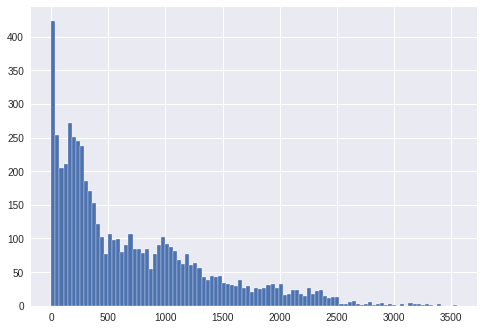

In [ ]:
 prepared_seoul_bike_rental_df["rented_bike_count"].hist(bins=100)

skewness

In [ ]:
rented_bike_count = train_df[train_df.rented_bike_count!=0].rented_bike_count.to_numpy()

skewness measure in target: 1.138639468046654


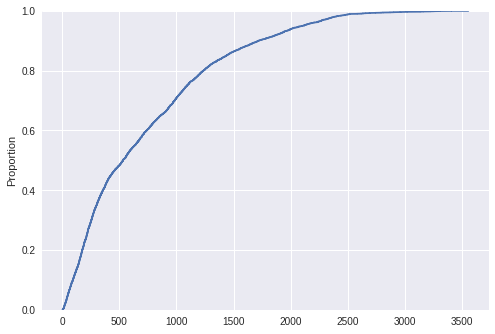

In [ ]:
print("skewness measure in target:",skew(rented_bike_count))
sns.ecdfplot(rented_bike_count)

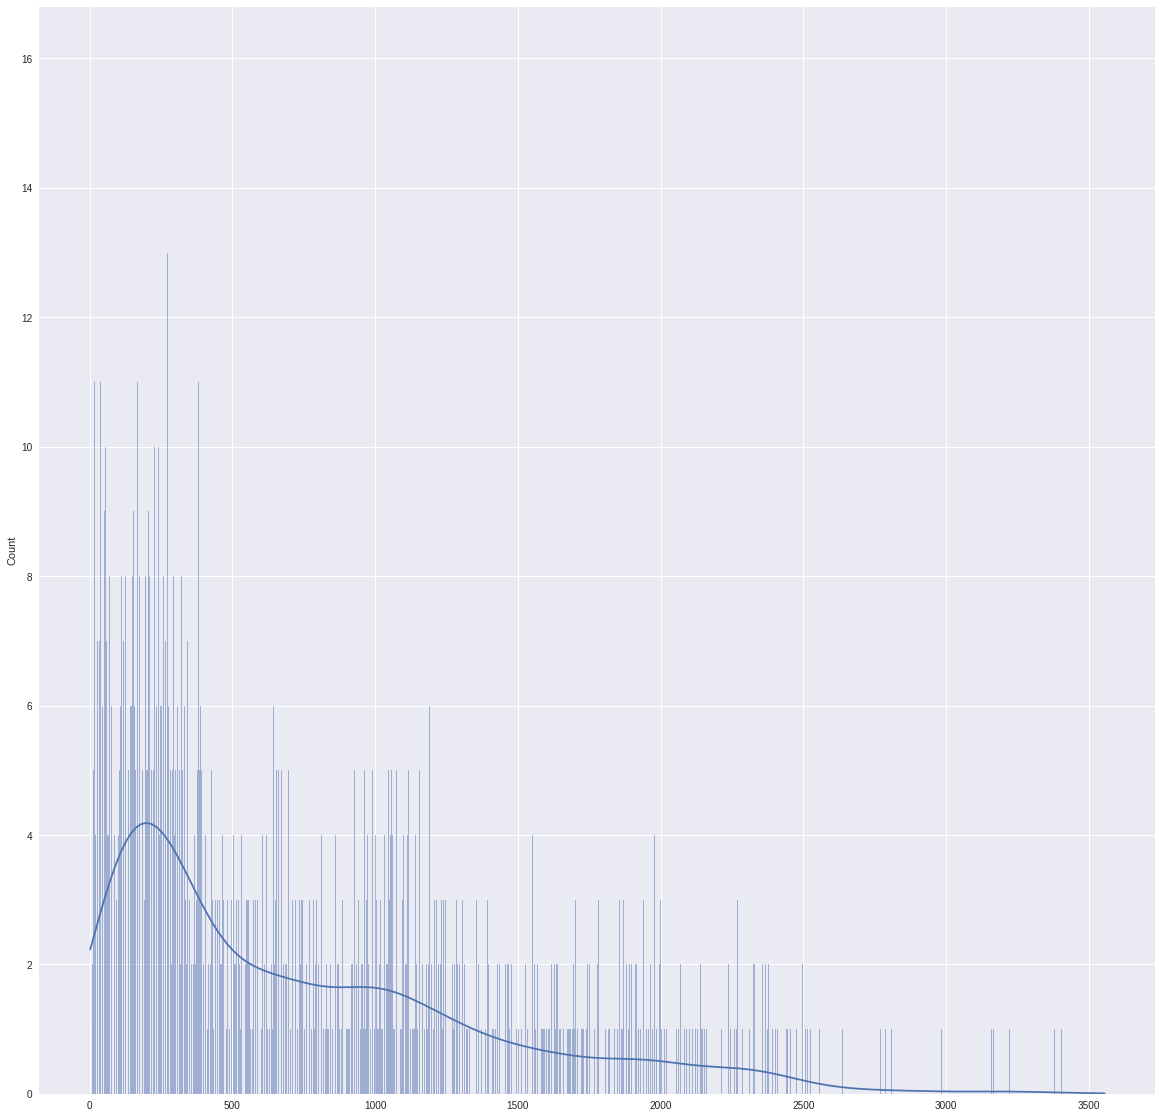

In [ ]:
sns.histplot(rented_bike_count,kde=True,bins=5000,ax=get_aca())

In [ ]:
pd.DataFrame(rented_bike_count).value_counts().head(20)

223    16
165    14
71     13
273    13
190    13
39     12
169    12
123    12
137    11
122    11
222    11
225    11
212    11
38     11
47     11
189    11
17     11
309    11
174    11
262    11
dtype: int64

skewness measure in target: [1.01630755]


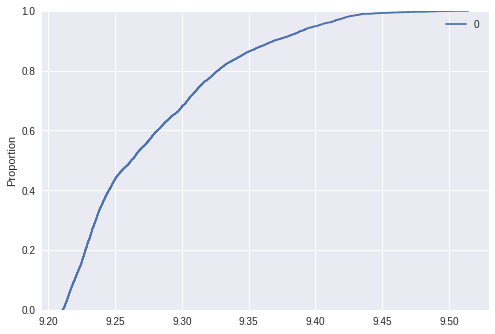

In [ ]:
rented_bike_count_fixed = pd.DataFrame(np.log(np.add(rented_bike_count.reshape(-1,1),10000)))
print("skewness measure in target:",skew(rented_bike_count_fixed))
sns.ecdfplot(rented_bike_count_fixed)

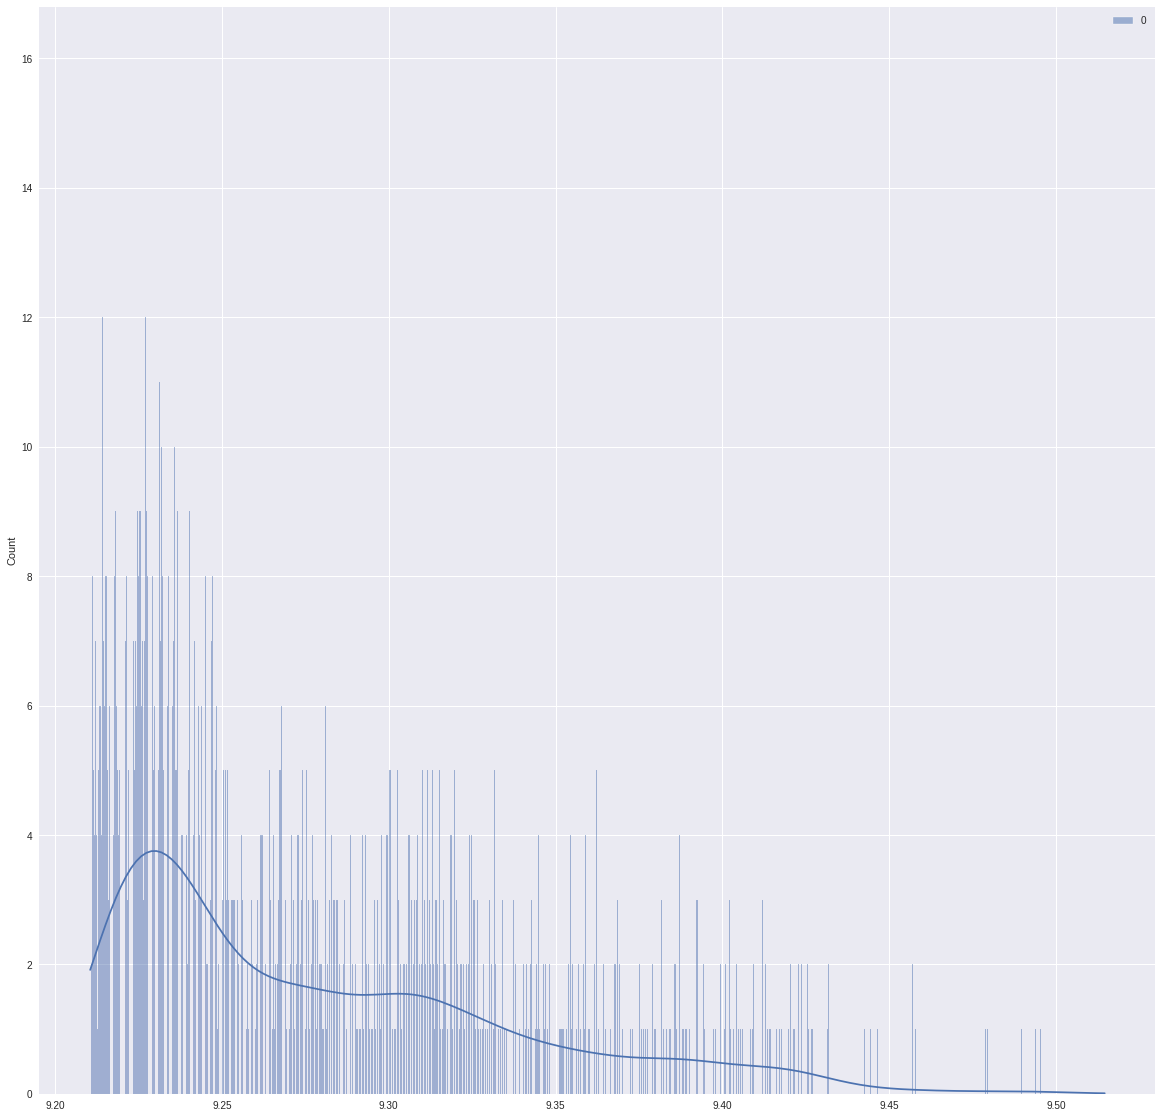

In [ ]:
sns.histplot(rented_bike_count_fixed,kde=True,bins=5000,ax=get_aca())

In [ ]:
# TODO: fix using power transform
# prepared_seoul_bike_rental_df["rented_bike_count"] = pd.DataFrame(np.power(prepared_seoul_bike_rental_df.rented_bike_count.to_numpy().reshape(-1,1),25))
# prepared_seoul_bike_rental_df["rented_bike_count"] = pd.DataFrame(np.log1p(np.add(prepared_seoul_bike_rental_df.rented_bike_count.to_numpy().reshape(-1,1),10000)))

In [ ]:
# prepared_seoul_bike_rental_df["rented_bike_count"]

In [ ]:
continuous_features.extend(["reel_feel_temperature","heat_index"])
numerical_features.extend(["reel_feel_temperature","heat_index"])
categorical_features.extend(["maxima","minima"])

In [ ]:
prepared_seoul_bike_rental_df['dew_cluster'] = prepared_seoul_bike_rental_df['dew_point_temperature_celsius']
prepared_seoul_bike_rental_df['dew_cluster'][(prepared_seoul_bike_rental_df['dew_point_temperature_celsius'] > 2) & (prepared_seoul_bike_rental_df['dew_point_temperature_celsius'] <= 18)] = 1
prepared_seoul_bike_rental_df['dew_cluster'][(prepared_seoul_bike_rental_df['dew_point_temperature_celsius'] > -12) & (prepared_seoul_bike_rental_df['dew_point_temperature_celsius'] <= 2)] = 2
prepared_seoul_bike_rental_df['dew_cluster'][(prepared_seoul_bike_rental_df['dew_point_temperature_celsius'] > 18) & (prepared_seoul_bike_rental_df['dew_point_temperature_celsius'] <= 24)] = 3
prepared_seoul_bike_rental_df['dew_cluster'][(prepared_seoul_bike_rental_df['dew_point_temperature_celsius'] > 24) | (prepared_seoul_bike_rental_df['dew_point_temperature_celsius'] <= -12)] = 4

prepared_seoul_bike_rental_df['vis_cluster'] = prepared_seoul_bike_rental_df['visibility_10_meter']
prepared_seoul_bike_rental_df['vis_cluster'][(prepared_seoul_bike_rental_df['visibility_10_meter'] > 1500) & (prepared_seoul_bike_rental_df['visibility_10_meter'] <= 2000)] = 1
prepared_seoul_bike_rental_df['vis_cluster'][(prepared_seoul_bike_rental_df['visibility_10_meter'] > 500) & (prepared_seoul_bike_rental_df['visibility_10_meter'] <= 1500)] = 2
prepared_seoul_bike_rental_df['vis_cluster'][(prepared_seoul_bike_rental_df['visibility_10_meter'] > 148) & (prepared_seoul_bike_rental_df['visibility_10_meter'] <= 500)] = 3
prepared_seoul_bike_rental_df['vis_cluster'][(prepared_seoul_bike_rental_df['visibility_10_meter'] <= 148)] = 4

In [ ]:
# "pay attention"
# prepared_seoul_bike_rental_df = prepared_seoul_bike_rental_df[((prepared_seoul_bike_rental_df["wind_speed_meter_per_sec"]!=0) & (prepared_seoul_bike_rental_df["test_sample"]==False)) | (prepared_seoul_bike_rental_df["test_sample"]==True)]
# prepared_seoul_bike_rental_df = prepared_seoul_bike_rental_df[((prepared_seoul_bike_rental_df["humidity_pct"]!=0) & (prepared_seoul_bike_rental_df["test_sample"]==False)) | (prepared_seoul_bike_rental_df["test_sample"]==True)]

In [ ]:
prepared_seoul_bike_rental_df['perfect_weather'] = prepared_seoul_bike_rental_df[['temperature_celsius', 'wind_speed_meter_per_sec']].apply(lambda x: (0, 1)[(x['temperature_celsius'] >= 20) & (x['wind_speed_meter_per_sec'] >= 1.5) & (x['wind_speed_meter_per_sec'] <= 3.5)], axis = 1)

prepared_seoul_bike_rental_df['bad_weather'] = prepared_seoul_bike_rental_df[[ 'rainfall_mm', 'snowfall_cm','visibility_10_meter', 'dew_point_temperature_celsius']].apply(lambda x: (0, 1)[(x['snowfall_cm'] > 1) | (x['rainfall_mm'] > 5) | ((x['dew_point_temperature_celsius'] < -15) & (x['visibility_10_meter'] <250))], axis = 1)

In [ ]:
def calc_heat_index(relative_humidity,temp_celsius):
    temp_fahrenheit = (temp_celsius * (9/5)) + 32
    return -42.379+(2.04901523*temp_fahrenheit)+(10.14333127*relative_humidity)-(0.22475541*temp_fahrenheit*relative_humidity)-(6.83783*0.001*np.power(temp_fahrenheit,2))-(5.481717*0.01*np.power(relative_humidity,2))+(1.22874*0.001*np.power(temp_fahrenheit,2)*relative_humidity)+(8.5282*0.0001*temp_fahrenheit*np.power(relative_humidity,2))-(1.99*0.000001*np.power(temp_fahrenheit,2)*np.power(relative_humidity,2))

prepared_seoul_bike_rental_df["heat_index"] = pd.Series(calc_heat_index(prepared_seoul_bike_rental_df["humidity_pct"],prepared_seoul_bike_rental_df.temperature_celsius))

In [ ]:
def calc_real_feel_temp(wind_speed,temp_celsius):
    wind_speed_adjust = wind_speed*3.6
    return 13.12+(0.6215*temp_celsius)-(11.37*np.power(wind_speed_adjust,0.16))+(0.3965*temp_celsius*np.power(wind_speed_adjust,0.16))

prepared_seoul_bike_rental_df["reel_feel_temperature"] = pd.Series(calc_real_feel_temp(prepared_seoul_bike_rental_df.wind_speed_meter_per_sec,prepared_seoul_bike_rental_df.temperature_celsius))

In [ ]:
prepared_seoul_bike_rental_df['hr_sin'] = np.sin(prepared_seoul_bike_rental_df.hour*(2.*np.pi/24))
prepared_seoul_bike_rental_df['hr_cos'] = np.cos(prepared_seoul_bike_rental_df.hour*(2.*np.pi/24))
prepared_seoul_bike_rental_df['mnth_sin'] = np.sin((prepared_seoul_bike_rental_df.month-1)*(2.*np.pi/12))
prepared_seoul_bike_rental_df['mnth_cos'] = np.cos((prepared_seoul_bike_rental_df.month-1)*(2.*np.pi/12))

In [ ]:
bool_list = ["holiday","functioning_day","perfect_weather","bad_weather","seasons_1","seasons_2","seasons_3","seasons_4"]
prepared_seoul_bike_rental_df = prepared_seoul_bike_rental_df.astype(dict(zip(bool_list,['bool']*len(bool_list))))